In [3]:
import numpy as np

In [55]:
import json

N_PFC_NEURONS = 500

data_dir = "/om2/group/halassa/PFCMD-ali-sabrina/011921_file-per-trial/by_trial"
s_trial = 250
t_trial = 499

# each neuron's activity is a row; column index is trial number
n_trials = t_trial - s_trial + 1
rPFC_avg = np.zeros((N_PFC_NEURONS, n_trials))
output_choice = np.zeros(n_trials)
task_input = np.zeros((2, n_trials))
task_target = np.zeros((2, n_trials))

    
for i in range(s_trial, t_trial+1):
    with open(data_dir + "/" + str(i) + ".json") as json_file:
        data = json.load(json_file)
        
        rPFC = np.array(data["network_rates"]["r_PFC"])
        trial_rPFC_avg = np.mean(rPFC, axis=0).reshape(-1,1).flatten()
        
        rOutput = np.array(data["network_rates"]["r_output"])
        trial_output_choice = np.mean(rOutput, axis=0).argmax(0)
        
        trial_task_input = np.array(data["trial_data"]["input"])
        trial_task_target = np.array(data["trial_data"]["target"])
           
        idx = i - s_trial
        rPFC_avg[:,idx] = trial_rPFC_avg
        output_choice[idx] = trial_output_choice
        task_input[:,idx] = trial_task_input
        task_target[:,idx] = trial_task_target
        

dict_keys(['MD_input', 'r_MD', 'r_PFC', 'r_output'])


In [51]:
import pandas as pd
import statsmodels.api as sm

dat = np.zeros((500, 3))

for i in range(0,500):
    neuron_idx = i

    # NOTE: For choice, inpt, and target 1 is UP and 0 is DOWN
    choice = output_choice
    inpt = task_input[1,:]
    target = task_target[1,:]
    trial_type = (inpt == target).astype(int)

    X = sm.add_constant(np.transpose([inpt, trial_type, choice]))
    y = rPFC_avg[neuron_idx,:]

    model = sm.OLS(y,X)
    results = model.fit()

    params = results.params
    rsquared = results.rsquared
    pvalues = results.pvalues
    
    dat[i,:] = params[1:]

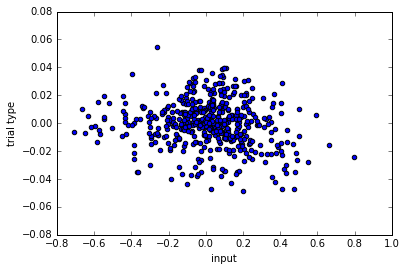

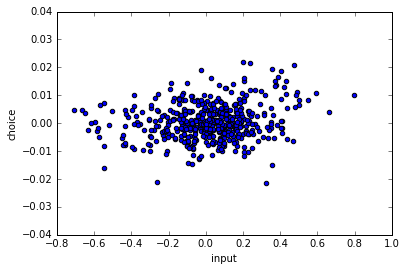

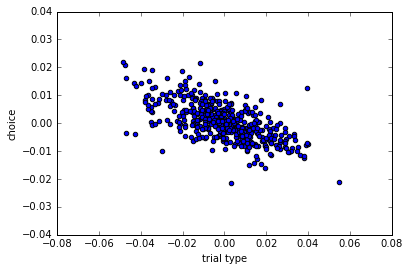

In [52]:
import matplotlib.pyplot as plt

plt.scatter(dat[:,0], dat[:,1])
plt.xlabel("input")
plt.ylabel("trial type")
plt.show()

plt.scatter(dat[:,0], dat[:,2])
plt.xlabel("input")
plt.ylabel("choice")
plt.show()

plt.scatter(dat[:,1], dat[:,2])
plt.xlabel("trial type")
plt.ylabel("choice")
plt.show()